## Get Europe Coverage

Get europe coverage from a sample data on 1st June 2023, then output dataframe of output receivers and its country

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from math import *

from IPython.display import clear_output

In [16]:
df = pd.read_csv('../pos_tables/europe/europe_pos_table_1min_2023-06-01_2023-06-01 00:00:00.csv')

df.drop_duplicates(subset=['rawmsg'], inplace = True)
df.dropna(subset=["lat"], inplace=True)
df.dropna(subset=["lon"], inplace=True)
df.dropna(subset=["lat"], inplace=True)

In [17]:
df['sensors'] = df['sensors'].apply(ast.literal_eval)

/Users/mfrahman/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/mfrahman/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


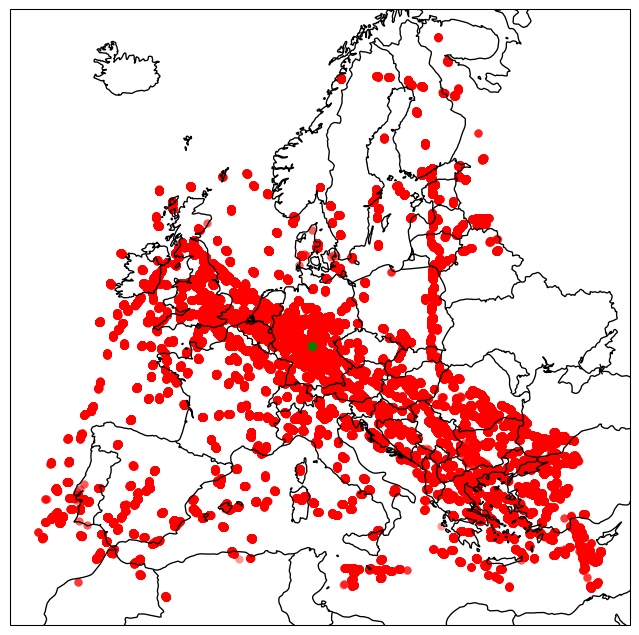

In [18]:
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# example: draw circle with 45 degree radius around the North pole
lat = 50
lon = 10

# Define the projection used to display the circle:
proj = ccrs.Orthographic(central_longitude=lon, central_latitude=lat)

# define image properties
width = 800
height = 800
dpi = 96
resolution = '50m'

# create figure
fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
ax = fig.add_subplot(1, 1, 1, projection=proj)

df_here = df

ax.scatter(df_here['lon'], df_here['lat'], linewidth = 0.1, alpha = 0.4, color = 'red', transform = ccrs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linestyle='-', alpha=1.0)
ax.add_feature(cartopy.feature.BORDERS, color = 'black', linestyle='-', alpha=1.0)

ax.scatter(lon, lat, color = 'green')

plt.axis('equal')
# plt.savefig('CircleTest.png', dpi=dpi)
plt.show()

In [30]:
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from shapely.geometry import Point

# Assuming 'lat' and 'lon' are columns in your DataFrame df
points = df[['lon', 'lat']].values

# Compute convex hull
hull = ConvexHull(points)

# Convert the convex hull points to a list of tuples
hull_points = [tuple(points[idx]) for idx in hull.vertices]

# Create a shapely Polygon object from the hull points
polygon = Polygon(hull_points)

## Get Receiver List

In [27]:
df_sensors = pd.read_json('file:///Users/mfrahman/Python/adsb_reception_prob_model/sensors/sensor_list.json')

df_sensors['position'] = df_sensors['position'].apply(dict)

df_sensors['lat'] = df_sensors['position'].apply(lambda x: x['latitude'])
df_sensors['lon'] = df_sensors['position'].apply(lambda x: x['longitude'])
df_sensors['alt'] = df_sensors['position'].apply(lambda x: x['altitude'])

In [38]:
df_sensors['inside_poly'] = False

# Iterate over each sensors point and check if it's inside the polygon
for idx, row in df_sensors.iterrows():
    point = Point(row['lon'], row['lat'])
    if polygon.contains(point):
        df_sensors.at[idx, 'inside_poly'] = True
        
df_sensors = df_sensors[df_sensors['inside_poly']]

## Get Active Receiver

In [62]:
active_sensor = []

for idx, row in df.iterrows():
    print('{}/{}'.format(idx, len(df)))
    clear_output(wait=True)
    
    for s in row.sensors:
        if(s['serial'] in active_sensor):
            continue
        else:
            active_sensor.append(s['serial'])

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
df_sensor = df_sensors[df_sensors['serial'].isin(active_sensor)]

sample_df = df_sensor.sample(n=200)

## Plot Receiver

/Users/mfrahman/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/mfrahman/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


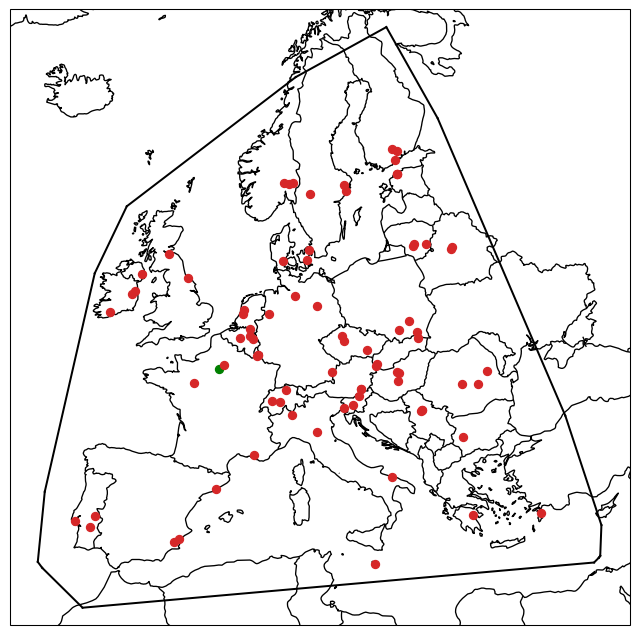

In [118]:
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the projection used to display the circle:
proj = ccrs.Orthographic(central_longitude=float(lon), central_latitude=float(lat))

# define image properties
width = 800
height = 800
dpi = 96
resolution = '50m'

# create figure
fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Plot the convex hull
# ax.scatter(points[:,0], points[:,1], color='tab:blue', alpha = 0.2, transform = ccrs.PlateCarree())

ax.scatter(sample_df['lon'], sample_df['lat'], color = 'tab:red', zorder = 20, transform = ccrs.PlateCarree())

for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], 'k-', transform = ccrs.PlateCarree())


ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linestyle='-', alpha=1.0)
ax.add_feature(cartopy.feature.BORDERS, color = 'black', linestyle='-', alpha=1.0)

ax.scatter(lon, lat, color = 'green')

plt.axis('equal')

# plt.savefig('{}/coverage.png'.format(path), dpi = dpi)
plt.show()

In [107]:
df_sensor.reset_index(inplace=True)
df_sensor

,index,id,uid,type,operator,serial,active,approved,added,clientMode,...,address,hostname,port,tags,deleted,lat,lon,alt,inside_poly,country
0,6,49,vlenders2,Radarcape,,1998347310,True,True,1432080000,True,...,,,0,,False,47.0,7.6,1800.0,True,XX
1,18,94,schaefer,Radarcape,,1344390019,True,True,1450310400,True,...,,,10003,,False,49.4,7.7,850.0,True,XX
2,19,124,Lutz,Radarcape,,80602915,True,True,1455580800,True,...,,,10001,,False,47.4,8.6,1400.0,True,XX
3,22,140,gringoli,Radarcape,,80708725,True,True,1458259200,True,...,,,0,,False,45.5,10.2,0.0,True,XX
4,24,154,ricciato,Radarcape,,83759315,True,True,1461542400,True,...,,,0,,False,46.0,14.4,0.0,True,XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,4590,11527,1084,dump1090,,-1408230253,True,True,1685404800,True,...,,,10001,,False,52.4,-1.0,250.0,True,XX
742,4592,11530,alann,dump1090,,-1408230249,True,True,1685491200,True,...,,,10001,,False,52.4,-2.0,800.0,True,XX
743,4593,11532,ETHS-Boris,dump1090,,-1408230247,True,True,1685491200,True,...,,,10001,,False,52.8,10.1,200.0,True,XX
744,4644,11618,CalamityJames,dump1090,,-1408236025,True,True,1686614400,True,...,,,10001,,False,51.2,0.4,0.0,True,XX


In [111]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

def get_country_name(lon, lat, country_shapefile):
    # Define the projection (PlateCarree for longitude/latitude)
    proj = ccrs.PlateCarree()

    # Create a Shapely Point object for the given longitude and latitude
    point = proj.transform_point(lon, lat, ccrs.PlateCarree())

    # Create a Shapely Point object
    point = shapely.geometry.Point(point[0], point[1])

    # Read the shapefile for the country
    shp = shpreader.Reader(country_shapefile)

    # Iterate through the records in the shapefile
    for record in shp.records():
        # Get the geometry and attributes for the current record
        geometry = record.geometry
        attributes = record.attributes

        if attributes['CONTINENT'] == 'Europe':
            if geometry.contains(point):
                # Return the name of the country
                return attributes['ISO_A2_EH']

    return None

country_shapefile = shapereader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')

country_code_list = []

for idx, row in df_sensor.iterrows():
    print('{}/{}'.format(idx, len(df_sensor)))
    clear_output(wait=True)
    
    country_code = get_country_name(row['lon'], row['lat'], country_shapefile)
    country_code_list.append(country_code)
    
# Get the name of the country for the given point
country_name = get_country_name(lon, lat, country_shapefile)

# Print the country name
if country_name:
    print("The point is inside", country_name)
else:
    print("The point is not inside any country")

The point is inside FR


In [113]:
df_sensor['country'] = country_code_list

df_sensor.to_json('../sensors/sensor_list_active_june_2023.json')

/var/folders/gt/7bzbbv711312cfd_13h4fkm5z8xgxd/T/ipykernel_75781/3649759910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor['country'] = country_code_list


In [116]:
sample_df = df_sensor.groupby('country').apply(lambda x: x.sample(min(3, len(x)))).reset_index(drop=True)

In [119]:
sample_df.to_json('../sensors/sensor_list_active_june_2023_3_per_country.json')

In [121]:
sample_df[sample_df['country'] == 'NL']

,index,id,uid,type,operator,serial,active,approved,added,clientMode,...,address,hostname,port,tags,deleted,lat,lon,alt,inside_poly,country
54,2564,7373,theot,Radarcape,,1163147025,True,True,1614470400,True,...,,,0,,False,52.5,4.9,0.0,True,NL
55,2935,8274,donolientje,dump1090,,-1408232545,True,True,1629590400,True,...,,,10001,,False,51.3,5.4,50.0,True,NL
56,605,2407,adorr,dump1090,,-1408236603,True,True,1536624000,True,...,,,10001,,False,52.3,4.8,0.0,True,NL
